In [1]:
import numpy as np
import pandas as pd
from logistic_rgr import LogisticRegression
import matplotlib.pyplot as plt

> Note: the implementation is in ```logistic_rgr.py``` file

## Reading the Data

In [2]:
df = pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Preprocessing

In [3]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#### dropping ```User ID``` and ```Gender``` cloumns

In [4]:
df = df.drop(columns = ['User ID', 'Gender'])

#### extracting X(features) and y from the dataFrame

In [5]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy().reshape(-1, 1)

#### adding column of 1. to the features (x0 = 1.)

In [6]:
X = np.c_[np.ones((X.shape[0], 1)), X]

#### splitting the data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Standardizing the Features (essential for Logistic regression case)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_tst_std = scaler.transform(X_tst)

## Logistic Regression

In [9]:
cls = LogisticRegression(n_iterations = 200, eta = 0.01)

In [10]:
cls.fit(X_train_std, y_train)

cost:  0.6931471805599466
cost:  0.48821047560231634
cost:  0.4589118756534972
cost:  0.4473516135798214
cost:  0.44154304666327837
cost:  0.43825949472399167
cost:  0.4362677499856426
cost:  0.4350017672774965
cost:  0.43417006417749426
cost:  0.4336101879973917
cost:  0.43322624217321215
cost:  0.4329591117354987
cost:  0.43277111246802447
cost:  0.43263757684031673
cost:  0.4325420111261145
cost:  0.4324731950327643
cost:  0.4324233868968112
cost:  0.43238718234801043
cost:  0.4323607717358559
cost:  0.4323414475801424
cost:  0.43232727246655944
cost:  0.43231685197699565
cost:  0.43230917757350784
cost:  0.4323035167699557
cost:  0.43229933568387396
cost:  0.4322962440097582
cost:  0.43229395566904744
cost:  0.43229226051357533
cost:  0.4322910038797925
cost:  0.4322900717544568
cost:  0.4322893799733206
cost:  0.4322888663321853
cost:  0.4322884848098028
cost:  0.4322882013276155
cost:  0.4322879906313719
cost:  0.43228783399389903
cost:  0.4322877175203151
cost:  0.43228763089611

## Evaluation

In [11]:
y_pred = cls.predict(X_tst_std)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

#### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_tst)
mat

array([[70,  5],
       [ 9, 36]], dtype=int64)

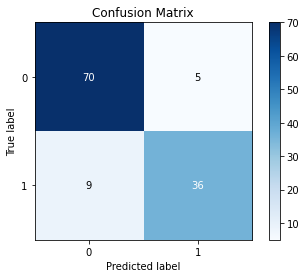

In [15]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_pred, y_tst)
plt.show()

#### F1-score

In [13]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_tst)

0.8372093023255814